# Week 48

v1.0.0

In [2]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## 1 Analysis of a data set obeying Michaelis-Menten kinetics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
pd.set_option('display.max_rows', 6)

The kinetics for an enzyme were investigated using the absorbance of the
product to calculate the initial velocities for a range of different
initial concentrations of the substrate. The data given in the dataset
`analys-data-set-obeyin.xlsx` was obtained. Use these data to answer the
following questions.

In [4]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [5]:
df = uploader.get_dataframe()
display(df)

#### (a) SI Units

Convert the concentrations of substrate and the velocities to the SI
units $\text{M}$ and $\text{M}\cdot\text{s}^{-1}$, respectively.

In [7]:
## Your task: Add new columns with both properties in proper SI units. 
## Use the column names: '[S]_(M)' and 'V0_(M/s)'
...
...
display(df)

#### (b) Plot & estimate

Plot the initial velocities, $V_0$, as a function of substrate
concentrations, $[S]$. Estimate $K_M$ and $V_\mathrm{max}$ from this
plot.

In [9]:
fig, ax = plt.subplots()

## Your task: Plot '[S]_(M)' vs 'V0_(M/s)'.
... # Your code here. 

## Sets x and y-axis labels:
ax.set_xlabel('[S] (M)')
ax.set_ylabel('V0 (M/s)')

## EXTRA: Sets the y-axis limits.
ax.set_ylim(0, df['V0_(M/s)'].max()*1.2)

Put your estimate of $K_M$ and $V_\text{max}$ in the cell below:

In [11]:
## Task: Put your estimate of the two parameters.
Vmax_estimate = ...
K_M_estimate = ...

#### (c) Fit

Now we want to fit using the Michaelis-Menten equation, as per usual
when the task is fitting we have to define the function we are fitting
with

In [13]:
def michaelis_menten(S, K_M, Vmax):
    ## Your task: Implement the Michaelis-Menten equation.
    ## Be careful with parentheses.
    result = ...
    return result

And then we can follow our usual procedure to make the fit

In [15]:
initial_guess = [K_M_estimate, Vmax_estimate]

## Your task: Use curve_fit 
fitted_parameters, trash = ...

## Extracts and prints
K_M_fit, Vmax_fit = fitted_parameters
print(Vmax_fit)
print(K_M_fit)

How do these values compare to your estimate?

#### (d) Plot fit & data

Plot the fit alongside the data.

In [17]:
## Your task: Evaluate the fit
S_smooth = np.linspace(0, 0.055)
V0_fit = ...

## Creates the figure
fig, ax = plt.subplots()

## Your task: Make plot of the fit.
...

## This plot the data and sets the options as before.
ax.plot(df['[S]_(M)'], df['V0_(M/s)'], 'o')

## Sets x and y-axis labels:
ax.set_xlabel('[S] (M)')
ax.set_ylabel('V0 (M/s)')

## EXTRA: Sets the y-axis limits.
ax.set_ylim(0, df['V0_(M/s)'].max()*1.2)

#### (e) $k_{cat}$

The enzyme concentration was $100 \ \mathrm{nM}$ use that and your fit
to determine $k_{cat}$.

In [19]:
## Your task: Set the enzyme concentration in proper units.
enzyme_concentration = ...

## Your task calculate kcat
kcat = ...
print(kcat)

------------------------------------------------------------------------

## 2 The Michaelis Menten equation

Consider a reaction catalyzed by an enzyme obeying the Michaelis-Menten
kinetics model.

$$
E + S \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \stackrel{k_2}{\rightarrow} E + P
$$

$$
V_0 = V_{\mathrm{max}} \frac{[S]}{[S] + K_M}
$$

#### (a) Enzyme saturation

Explain what is meant by enzyme saturation.

#### (b) Enzyme saturation

Calculate the level of enzyme saturation, $f_{ES}$, at substrate
concentrations of

-   $[S] = 0.1 \cdot K_M$
-   $[S] = 0.5 \cdot K_M$
-   $[S] = 1 \cdot K_M$
-   $[S] = 10 \cdot K_M$
-   $[S] = 100 \cdot K_M$

In [22]:
## Your task calculate the degree of enzyme saturation for the prescribed cases
...

------------------------------------------------------------------------

#### (c) Compare $K_M$ and $K_D$.

The Michaelis-Menten constant $K_M$ is defined as:

$$
K_M = \frac{k_{-1}+ k_2}{k_1}
$$

In a specific reaction, the following rate constants were determined:

-   $k_1 = 7 \cdot 10^7 \cdot \mathrm{M}^{-1}\cdot \mathrm{s}^{-1}$,
-   $k_{-1} = 8 \cdot 10^5 \ \mathrm{s}^{-1}$
-   $k_2 = 10^3 \ \mathrm{s}^{-1}$

Calculate the values of $K_M$ and $K_D$ (The dissociation constant of
the enzyme:substrate complex).

Does $K_M$ approximate the dissociation constant for the $ES$ complex in
this case, and how can this be estimated directly from the values of the
microscopic rate constants?

In [26]:
## Your task: Assign known values
... 

## Your task: Calculate K_M and K_D
K_M = ...
K_D = ...

print(K_M)
print(K_D)

#### (d) Calculate $k_2$

Assume that a solution of an enzyme at a concentration of
$1 \cdot 10^{-7} \ \mathrm{M}$ with a substrate concentration of
$[S]=100\cdot K_M$ has $V_0=10^{-4} \ \mathrm{M} \cdot \mathrm{s}^{-1}$

Given this information and with your answers to (b) and (c) in mind,
approximate the constant $k_2$. What is this constant also called?

In [29]:
## Your task: Assign known values
...

## Your task: Once you have figured out how to calculate k2, use Python to calculate it.
...
print(k2)

#### (e) Lineweaver-Burk plot

The values of $V_\mathrm{max}$ and $K_M$ have historically been
determined from a Lineweaver-Burk plot.

How does the x- and y-intercepts in a Lineweaver-Burk plot relate to
$V_\mathrm{max}$ and $K_M$?

------------------------------------------------------------------------

## 3 Enzyme inhibitors (I)

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
pd.set_option('display.max_rows', 6)

An enzyme obeying the Michaelis-Menten kinetics model was tested for
substrate conversion in the absence and presence of an inhibitor, called
inhibitor1 at a concentration of
$[\textrm{I}] = 2.5 \cdot 10^{-3} \ \textrm{M}$. The data set is
contained in the file `enzyme-inhib-i.xlsx`. Using this data a
researcher wanted to determine the type of inhibition.

Start by loading the dataset

In [34]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [35]:
df = uploader.get_dataframe()
display(df)

#### (a) Convert units

Convert the concentrations of substrate and the initial velocities to
units given in M and $\mathrm{M}\cdot \mathrm{s}^{-1}$, respectively.

In [37]:
## Your task: Make new columns with the properties in SI units. 
df['[S]_(M)'] = ...
df['V0_no_inhib_(M/s)'] = ...
... # This one you'll have to do all on your own.
display(df)

#### (b) Plot

Plot the initial velocities of both experiments as a function of
substrate concentration in one plot. Estimate $K_M$ and $V_\mathrm{max}$
in the presence and absence of inhibitor from the plot.

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))

## Your task: Plot the initial velocities for both experiments. 
... # Your code for plotting here
... # and here. 

## Sets the x and y-axis labels and shows the legend.
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')
ax.legend()

Use the plots to estimate $K_M$ and $V_\mathrm{max}$ and assign in the
cell below

In [41]:
## Your task: Estimate parameters without inhibitor.
K_M_no_inhib_estimate = ...
Vmax_no_inhib_estimate = ...

## Your task: Estimate parameters with inhibitor.
K_M_inhib_estimate = ...
Vmax_inhib_estimate = ...

#### (c) Fit

The researcher wanted to determine $V_\mathrm{max}$ and $K_M$ values for
both experiments in order to correctly conclude on the type of
inhibitor.

Determine $V_\mathrm{max}$ and $K_M$ by fitting.

Start writing the function to fit with

In [43]:
## Your task: Implement the Michealis-Menten equation as a function
def michaelis_menten(S, Vmax, Km):
    result = ...
    return result

And use the `curve_fit`-function to find the parameters

In [45]:
## Your task: Make a fit to the Michealies-Menten equation for the data without the inhibitor.
initial_guess = [Vmax_no_inhib_estimate, K_M_no_inhib_estimate]
fitted_parameters, trash = ...
vmax_fit_no_inhib, km_fit_no_inhib = fitted_parameters

## Your task: Make a fit to the Michealies-Menten equation for the data the inhibitor.
initial_guess = [Vmax_inhib_estimate, K_M_inhib_estimate]
fitted_parameters, trash = ...
vmax_fit_inhib, km_fit_inhib = fitted_parameters

## Printing
print('Without inhibitor:')
print('    V_max:', vmax_fit_no_inhib)
print('    K_M:', km_fit_no_inhib)
print('With inhibitor:')
print('    V_max:', vmax_fit_inhib)
print('    K_M:', km_fit_inhib)

Which of the kinetic parameters changes substantively in the presence of
the inhibitor

#### (d) Analyze the fit

As per usual, we need to plot the fit to confirm that that it has been
done successfully.

We start by evaluating the fit for each set of parameters - those with
and those without the inhibitor.

In [48]:
## Your task: Evaluate the fits for both cases
S_smooth = np.linspace(0.0, 0.055)
V0_no_inhib_model = ...
V0_inhib_model = ...

Copy your code from above and then we plot the fit along with the data,

In [50]:
## Your task: Copy your plotting code from above and add the two lines to plot the fits.

#### (e) Inhibitor type

What type of inhibitor is inhibitor1?

#### (f) $K_i$

The experiment was done in the presence of 2.5 mM of the inhibitor. What
is the $K_i$ for this inhibitor?

In [53]:
## Your task: Set the inhibitor concentration in M.
I_concentration = ...

## Your task: Calculate K_i from the fitted K_M values
K_i = ...

print(K_i)

------------------------------------------------------------------------

## 4 Enzyme inhibitors (II)

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
pd.set_option('display.max_rows', 6)

Two enzyme inhibitors were identified as part of a drug discovery
program. To characterize the mechanism of action, the reaction kinetics
were analysed for the enzyme alone and in the presence of 5 $\mu$M of
each of the inhibitors as a function of substrate concentration
resulting in the data in the file `enzyme-inhib-ii.xlsx`

Load the dataset

In [56]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [57]:
df = uploader.get_dataframe()
display(df)

#### (a) Convert & plot

Convert the measurements to SI units and plot the initial reaction
velocity versus substrate concentration for all three reactions.

Start by converting the units

In [59]:
## Your task: Add new columns with the properties in the correct SI units. 
## There are 4 properties, so you should add 4 columns. 
... # Your code to convert units here.

And then plot to visualize the data

In [61]:
fig, ax = plt.subplots()

## Your task plot each data vs. [S]_(M).
## To distinguish the data its a good idea to use label='enz_(M/s)' and so on.
...
...
...
    
ax.legend()
ax.set_xlabel('Substrate concentration [M]', fontsize=14)
ax.set_ylabel('$V_0$', fontsize=14)
plt.show()

#### (b) Estimate parameters

Based on the appearance of these plots:

-   Which dataset would have the highest $V_\mathrm{max}$, which the
    lowest?
-   What about $K_M$?

Based on your answers,

-   Can you determine the type of inhibition?
-   Alternatively, can you exclude some mechanisms?

#### (c) Fit

As always, we need the function we’re fitting with

In [64]:
def michaelis_menten(S, Vmax, Km):
    return Vmax * S / (S + Km)

And then we can make the fit

In [65]:
## Your task fit dataset 1: 'enz_(M/s)'
initial_guess = [..., ...]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['enz_(M/s)'], initial_guess)
Vmax_enz_fit, K_M_enz_fit = fitted_parameters

## Your task fit dataset 2: 'inhibitor2_(M/s)'
initial_guess = [..., ...]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['inhibitor2_(M/s)'], initial_guess)
Vmax_inhib2_fit, K_M_inhib2_fit = fitted_parameters

## Your task fit dataset 3: 'inhibitor2_(M/s)'
initial_guess = [..., ...]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['inhibitor3_(M/s)'], initial_guess)
Vmax_inhib3_fit, K_M_inhib3_fit = fitted_parameters

print('Dataset 1: enz_(M/s)')
print('    V_max', Vmax_enz_fit)
print('    K_M', K_M_enz_fit)
print('Dataset 2: inhibitor2_(M/s)')
print('    V_max', Vmax_inhib2_fit)
print('    K_M', K_M_inhib2_fit)
print('Dataset 3: inhibitor3_(M/s)')
print('    V_max', Vmax_inhib3_fit)
print('    K_M', K_M_inhib3_fit)

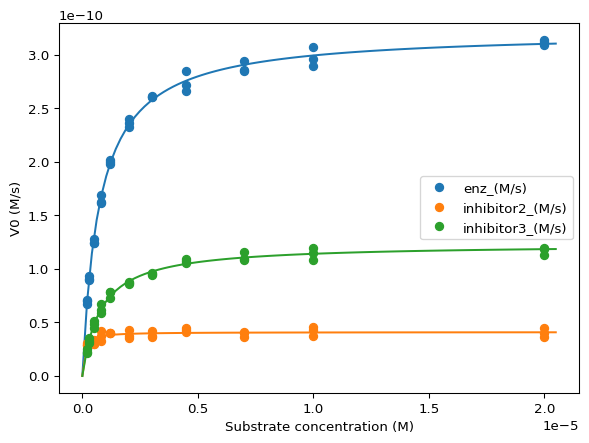

In [67]:
fig, ax = plt.subplots()

## Your task: Evaluate the fits
S_smooth = np.linspace(0, 2.05*10**(-5), 100)
V0_enz = michaelis_menten(S_smooth, Vmax_enz_fit, K_M_enz_fit)
V0_inhib2 = michaelis_menten(S_smooth, Vmax_inhib2_fit, K_M_inhib2_fit)
V0_inhib3 = michaelis_menten(S_smooth, Vmax_inhib3_fit, K_M_inhib3_fit)

## Plots the fits
ax.plot(S_smooth, V0_enz)
ax.plot(S_smooth, V0_inhib2)
ax.plot(S_smooth, V0_inhib3)

## Plots the data
ax.plot(df['[S]_(M)'], df['enz_(M/s)'], 'o', label='enz_(M/s)', color='C0')
ax.plot(df['[S]_(M)'], df['inhibitor2_(M/s)'], 'o', label='inhibitor2_(M/s)', color='C1')
ax.plot(df['[S]_(M)'], df['inhibitor3_(M/s)'], 'o', label='inhibitor3_(M/s)', color='C2')

## Adds legend and axis labels. 
ax.legend()
ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('V0 (M/s)')
plt.show()

If your fits don’t closely match the data, go back and change your
initial guesses.

#### (d) Type of inhibitor

We call $V_\mathrm{max}$ and $K_\mathrm{M}$ recorded in the presence of
the inhibitor for $V_\mathrm{max}^{app}$ and $K_\mathrm{M}^{app}$
($app = \mathrm{apparent}$).

Calcuate how much each value changes in the presence of the inhibitor by
dividing them by the parameters determined in the absence of an
inhibitor.

In [68]:
## Your task: Calculate the ratio nof K_M^app / K_M
K_M_ratio2 = K_M_inhib2_fit / K_M_enz_fit
K_M_ratio3 = K_M_inhib3_fit / K_M_enz_fit

## Your task: Calculate the ratio nof Vmax^app / Vmax
Vmax_ratio2 = Vmax_inhib2_fit / Vmax_enz_fit
Vmax_ratio3 = Vmax_inhib3_fit / Vmax_enz_fit

## Prints the ratios
print('Inhibitor 2')
print('K_M', K_M_ratio2)
print('Vmax', Vmax_ratio2)

print('Inhibitor 3')
print('K_M', K_M_ratio3)
print('Vmax', Vmax_ratio3)

Based on the above, what is the likely inhibition type of inhibitor2 and
inhibitor3?

#### (e) $K_i$

Determine the $K_i$ for each of the two inhibitors. The inhibitor
concentration is 5 $\mu\mathrm{M}$.

In [71]:
## Your task: Assign known value
I = ...

## Your task: Calculate K_I for both cases. 
## You should derive the correct expression before doing any coding!
K_I_inhib2 = ...
K_I_inhib3 = ...

## Prints the results
print('Inhibitor 2: ', K_I_inhib2)
print('Inhibitor 3: ', K_I_inhib3)

------------------------------------------------------------------------

## 5 Enzymatic behaviour of the enzyme ATCase

In [83]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display

The enzyme aspartate transcarbamoylase (ATCase) catalyzes the first
reaction in the biosynthesis of pyrimidines such as CTP as shown in the
reaction below:

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/course/lessons/figures/atcase.png)

ATCase does not obey the Michaelis-Menten kinetics model but instead
shows the behaviour recorded in the `enzyme-behav-atcase.csv` dataset.

The dataset consists of three columns; the aspartate concentration in mM
and the rate of formation of N-carbamyolaspartate with and without the
presence of CTP.

Load the dataset with the widget below

In [84]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [85]:
df = uploader.get_dataframe()
display(df)

#### (a) Units & Plot

In [87]:
## Your task: Add columns with the properties in SI units.
df['[aspartate]_(M)'] = ...
df['rate_(M/s)'] = ...
df['rate_ctp_(M/s)'] = ...

Make a plot of the `rate_(M/s)` dataset versus the aspartate
concentration.

In [89]:
fig, ax = plt.subplots()

## Your task: Plot the dataset
...

## Adds legend and labels.
ax.set_xlabel('[Aspartate] (M)')
ax.set_ylabel('Rate of formation (M/s)')
ax.legend()

#### (b) Kinetic profile

Looking at the curve without CTP, describe the kinetic profile of ATCase
and explain what it tells us about the way ATCase works. (You may find
inspiration in the material previously covered on protein-ligand
interactions)

#### (c) Quarternary structure

What does the figure tell us about the quaternary structure of ATCase?

#### (d) Effect of CTP

Copy your plotting code from above and add a line to also plot the
`rate_ctp_(M/s)` dataset.

In [93]:
## Your task: Copy your plotting code and add a line to also plot the rate_ctp_(M/s) dataset.
...

Qualitatively describe the effect of CTP on the rate of
N-carbamyolaspartate formation

#### (e) Physiological advantage

In fact many enzymes are regulated by certain end products in a fashion
similar to the CTP effect on ATCase. Can you explain why this might be a
physiological advantage?

#### (f) Regression with Hill equation.

There is also a formulation of the Hill equation for the enzyme
kinetics, which has the following form: $$
v = \frac{V_\mathrm{max} \cdot S^h}{K_{\frac{1}{2}}^h+S^h}
$$

Note, that we use a formulation of the Hill equation, where the constant
on the denominator is raised to the power of $h$. Therefore, the
constant also marks the half-way saturation concentration and we denote
it $K_{\frac{1}{2}}$

As usual start by writing a function implementing this equation

In [97]:
def hill_eq(S, Vmax, K, h):
    ## Your task: Implement the enzyme kinetics Hill equation.
    result = ...
    return result

print(hill_eq(1, 1, 1, 1)) # Should give 0.5 -> (1 * 1^1) / (1**1 + 1**1) = (1 * 1) / (1 + 1) = 1/2

And then make the fit for each dataset of rates vs. aspartate
concentration.

In [99]:
## Your task: Make the fit for the dataset without CTP
fitted_parameters_noctp, trash = ...
Vmax_fit_noctp, K_fit_noctp, h_fit_noctp = fitted_parameters_noctp

## Your task: Make the fit for the dataset with CTP
fitted_parameters_ctp, trash = ...
Vmax_fit_ctp, K_fit_ctp, h_fit_ctp = fitted_parameters_ctp

The next cell prints the fitted parameters for both cases.

In [101]:
print('Without CTP')
print('    Vmax', Vmax_fit_noctp)
print('    K1/2', K_fit_noctp)
print('    h', h_fit_noctp)

print('With CTP')
print('    Vmax', Vmax_fit_ctp)
print('    K1/2', K_fit_ctp)
print('    h', h_fit_ctp)

Then we can plot

In [103]:
fig, ax = plt.subplots()

## Your task: Calculate the fits
S_smooth = np.linspace(0, 50*10**(-3))
V_fit_noctp = ...
V_fit_ctp = ...

## Your task: Plot the fits:
...
...

## Plots the datasets
ax.plot(df['[aspartate]_(M)'], df['rate_(M/s)'], 'o', label='No CTP', color='C0')
ax.plot(df['[aspartate]_(M)'], df['rate_ctp_(M/s)'], 'o', label='CTP', color='C1')

## Labels & legend
ax.set_xlabel('[Aspartate] (M)')
ax.set_ylabel('v (M/s)')
ax.legend()

How do the constants of the Hill equation change in response to the
presence of CTP?  
Does this match your expectations?